# FUZZY JOB ROLE SALARY

IMPORT LIBRARY
---

In [600]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

DATASET
---

In [601]:
dataset_salary = pd.read_csv("Salary.csv")
dataset_salary

,ID,Role,Years Experience,Salary(in million),Worth?
0,ID01,Software Engineer,2,3.0,?
1,ID02,Junior Backend Developer,0,5.5,?
2,ID03,Fullstack Developer,2,9.2,?
3,ID04,UI / UX Designer,2,7.0,?
4,ID05,System Developer,3,6.0,?
5,ID06,Account Manager,1,5.9,?
6,ID07,QA Engineer,2,7.4,?


In [602]:
data_role = np.array(dataset_salary)
data_role = data_role [:,[0,1]]
pd.DataFrame(data_role)

,0,1
0,ID01,Software Engineer
1,ID02,Junior Backend Developer
2,ID03,Fullstack Developer
3,ID04,UI / UX Designer
4,ID05,System Developer
5,ID06,Account Manager
6,ID07,QA Engineer


In [603]:
data_exp = np.array(dataset_salary)
data_exp = data_exp [:,[0,2]]
pd.DataFrame(data_exp)

,0,1
0,ID01,2
1,ID02,0
2,ID03,2
3,ID04,2
4,ID05,3
5,ID06,1
6,ID07,2


In [604]:
data_salary = np.array(dataset_salary)
data_salary = data_salary [:,[0,3]]
pd.DataFrame(data_salary)

,0,1
0,ID01,3.0
1,ID02,5.5
2,ID03,9.2
3,ID04,7.0
4,ID05,6.0
5,ID06,5.9
6,ID07,7.4


In [605]:
role = {}
for i in range (1, data_role[0:,1].size + 1):
    role['role%02d' % i] = np.sum(data_role[i-1:i,1])
    
pd.DataFrame([role]) 

,role01,role02,role03,role04,role05,role06,role07
0,Software Engineer,Junior Backend Developer,Fullstack Developer,UI / UX Designer,System Developer,Account Manager,QA Engineer


In [606]:
exp = {}
for i in range (1, data_exp[0:,1].size + 1):
    exp['exp%02d' % i] = np.sum(data_exp[i-1:i,1])
    
pd.DataFrame([exp])

,exp01,exp02,exp03,exp04,exp05,exp06,exp07
0,2,0,2,2,3,1,2


In [607]:
salary = {}
for i in range (1, data_salary[0:,1].size + 1):
    salary['salary%02d' % i] = np.sum(data_salary[i-1:i,1]) 
    
pd.DataFrame([salary])

,salary01,salary02,salary03,salary04,salary05,salary06,salary07
0,3.0,5.5,9.2,7.0,6.0,5.9,7.4


MODEL FUZZY
---

In [608]:
def rangeSubject (_low, _high, _step):
    subject = np.arange(_low, _high, _step)
    return subject

def fuzzySalary(_rule, _range_subject, _title, _xlabel):
    lo = fuzz.trimf(_range_subject, _rule[0])
    mi = fuzz.trimf(_range_subject, _rule[1])
    hi = fuzz.trimf(_range_subject, _rule[2])
    
    fig, ax = plt.subplots(1, figsize=(12, 6))
    ax.plot(_range_subject, lo, 'g', label = 'LOW')
    ax.plot(_range_subject, mi, 'b', label = 'AVERAGE')
    ax.plot(_range_subject, hi, 'r', label = 'HIGH')
    
    
    ax.set_title(_title)
    ax.set_xlabel(_xlabel)
    ax.legend()
    
    
    plt.tight_layout()
    return lo,mi,hi

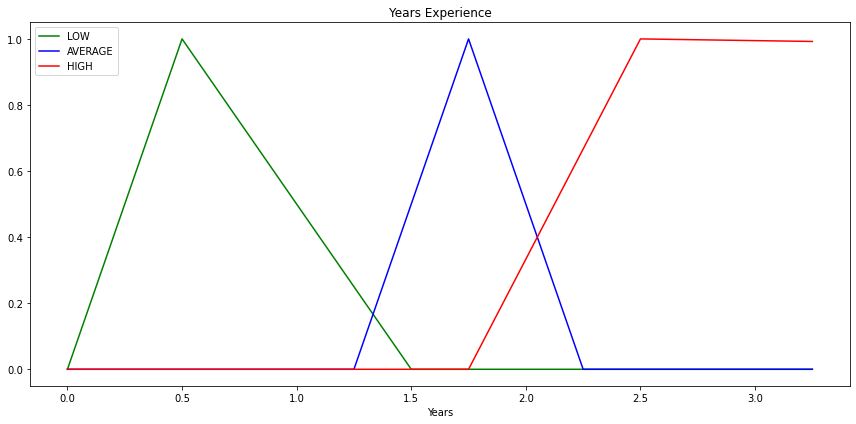

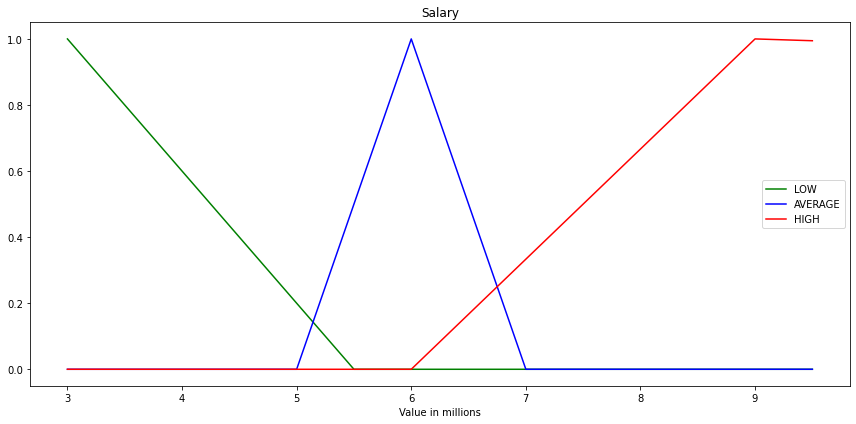

In [609]:
x_exp = rangeSubject(0,3.5,.25)
r_exp = np.array([
    [0,0.5,1.5],[1.25,1.75,2.25],[1.75,2.5,100]
])

x_salary = rangeSubject(3,10,.5)
r_salary = np.array([
    [1,3,5.5],[5,6,7],[6,9,100]
])

lo_exp, mi_exp, hi_exp = fuzzySalary(r_exp, x_exp, 'Years Experience','Years')
lo_salary, mi_salary, hi_salary = fuzzySalary(r_salary, x_salary, 'Salary','Value in millions')

In [610]:
def funcMem(_range, _lo, _mi, _hi, n):
    lo = fuzz.interp_membership(_range, _lo, n)
    mi = fuzz.interp_membership(_range, _mi, n)
    hi = fuzz.interp_membership(_range, _hi, n)
    
    return lo,mi,hi

def Status(_membership):
    status = ''
    if _membership[0] >= _membership[1] and _membership[0] >= _membership[2]:
        status = 'LOW'
    elif _membership[1] >= _membership[0] and _membership[1] >= _membership[2]:
        status = 'AVERAGE'
    elif _membership[2] >= _membership[0] and _membership[2] >= _membership[1]:
        status = 'HIGH'
        
    return status

In [611]:
f_exp = {}
s_exp = {}
for i in range (1, len(salary.values())+ 1):
    f_exp['f_exp%02d' % i] = funcMem(x_exp, lo_exp, mi_exp, hi_exp, exp['exp%02d' % i])
    s_exp['s_exp%02d' % i] = Status(f_exp['f_exp%02d' % i])
    print('Years Experience ',['%02d' % i],"(",exp['exp%02d' % i]," Years)",' : ',f_exp['f_exp%02d' % i], s_exp['s_exp%02d' % i])

Years Experience  ['01'] ( 2  Years)  :  (0.0, 0.5, 0.3333333333333333) AVERAGE
Years Experience  ['02'] ( 0  Years)  :  (0.0, 0.0, 0.0) LOW
Years Experience  ['03'] ( 2  Years)  :  (0.0, 0.5, 0.3333333333333333) AVERAGE
Years Experience  ['04'] ( 2  Years)  :  (0.0, 0.5, 0.3333333333333333) AVERAGE
Years Experience  ['05'] ( 3  Years)  :  (0.0, 0.0, 0.9948717948717949) HIGH
Years Experience  ['06'] ( 1  Years)  :  (0.5, 0.0, 0.0) LOW
Years Experience  ['07'] ( 2  Years)  :  (0.0, 0.5, 0.3333333333333333) AVERAGE


In [612]:
f_salary = {}
s_salary = {}
for i in range (1, len(salary.values())+ 1):
    f_salary['f_salary%02d' % i] = funcMem(x_salary, lo_salary, mi_salary, hi_salary, salary['salary%02d' % i])
    s_salary['s_salary%02d' % i] = Status(f_salary['f_salary%02d' % i])
    print('Salary',['%02d' % i],"(",salary['salary%02d' % i],"M)",' : ',f_salary['f_salary%02d' % i], s_salary['s_salary%02d' % i])

Salary ['01'] ( 3.0 M)  :  (1.0, 0.0, 0.0) LOW
Salary ['02'] ( 5.5 M)  :  (0.0, 0.5, 0.0) AVERAGE
Salary ['03'] ( 9.2 M)  :  (0.0, 0.0, 0.9978021978021978) HIGH
Salary ['04'] ( 7.0 M)  :  (0.0, 0.0, 0.3333333333333333) HIGH
Salary ['05'] ( 6.0 M)  :  (0.0, 1.0, 0.0) AVERAGE
Salary ['06'] ( 5.9 M)  :  (0.0, 0.9000000000000004, 0.0) AVERAGE
Salary ['07'] ( 7.4 M)  :  (0.0, 0.0, 0.4666666666666668) HIGH


In [613]:
dataset_salary

,ID,Role,Years Experience,Salary(in million),Worth?
0,ID01,Software Engineer,2,3.0,?
1,ID02,Junior Backend Developer,0,5.5,?
2,ID03,Fullstack Developer,2,9.2,?
3,ID04,UI / UX Designer,2,7.0,?
4,ID05,System Developer,3,6.0,?
5,ID06,Account Manager,1,5.9,?
6,ID07,QA Engineer,2,7.4,?


In [616]:
def worthIt (s_exp, s_salary):
    low_exp = 3
    low_salary = 1
    av_exp = 2
    av_salary = 2
    high_exp = 1
    high_salary = 3
    if s_exp == 'LOW':
        s_exp = low_exp
    elif s_exp == 'AVERAGE':
        s_exp = av_exp
    elif s_exp == 'HIGH':
        s_exp = high_exp

    if s_salary == 'LOW':
        s_salary = low_salary
    elif s_salary == 'AVERAGE':
        s_salary = av_salary
    elif s_salary == 'HIGH':
        s_salary = high_salary
        
    if s_exp + s_salary < 4:
        return 'NO'
    elif s_exp + s_salary == 4:
        return 'YES'
    elif s_exp + s_salary >= 4:
        return 'YES'

In [617]:
status_data_exp = {}
status_data_salary = {}
new_dataset_salary = dataset_salary
for i in range (0, len(new_dataset_salary['Years Experience'])):
    status_data_exp['status_data_exp%02d' % i] = s_exp['s_exp%02d' % (i+1)]
    status_data_salary['status_data_salary%02d' % i] = s_salary['s_salary%02d' % (i+1)]
    new_dataset_salary['Years Experience'][i] = status_data_exp['status_data_exp%02d' % i]
    new_dataset_salary['Salary(in million)'][i] = status_data_salary['status_data_salary%02d' % i]
    new_dataset_salary['Worth?'][i] = worthIt (status_data_exp['status_data_exp%02d' % i], status_data_salary['status_data_salary%02d' % i])

pd.DataFrame(new_dataset_salary)

,ID,Role,Years Experience,Salary(in million),Worth?
0,ID01,Software Engineer,AVERAGE,LOW,NO
1,ID02,Junior Backend Developer,LOW,AVERAGE,YES
2,ID03,Fullstack Developer,AVERAGE,HIGH,YES
3,ID04,UI / UX Designer,AVERAGE,HIGH,YES
4,ID05,System Developer,HIGH,AVERAGE,NO
5,ID06,Account Manager,LOW,AVERAGE,YES
6,ID07,QA Engineer,AVERAGE,HIGH,YES


---
THANKS
---
---